In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints
from volumetricspy.utils import azimuth_matrix, angle_matrix
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
p1 = Dot(x=10,y=20,z=1, fields={'phi':0.15})


In [4]:
p1.df()

,x,y,z,crs,phi
0,10.0,20.0,1.0,None,0.15


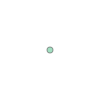

In [5]:
p1.to_shapely()

In [6]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
...,...,...,...,...,...
284,190,199,1,0.109411,3.247265
285,190,419,0,0.099541,1.528003
286,920,379,0,0.094099,2.514597
287,60,149,0,0.100167,3.636854


In [7]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


In [8]:
cp.distance_matrix().shape

(289, 289)

In [9]:
cps = cp.sample(n=10)
cps

CloudPoints(points=[Dot(x=190.0, y=419.0, z=None, crs=None, fields={'Facies': 0.0, 'Porosity': 0.0995413, 'Perm': 1.528003187}), Dot(x=690.0, y=559.0, z=None, crs=None, fields={'Facies': 0.0, 'Porosity': 0.109997744, 'Perm': 4.75045942}), Dot(x=730.0, y=169.0, z=None, crs=None, fields={'Facies': 1.0, 'Porosity': 0.133723851, 'Perm': 7.35009743}), Dot(x=800.0, y=900.0, z=None, crs=None, fields={'Facies': 1.0, 'Porosity': 0.105208576, 'Perm': 2.792794602}), Dot(x=130.0, y=269.0, z=None, crs=None, fields={'Facies': 0.0, 'Porosity': 0.096372607, 'Perm': 1.960928322}), Dot(x=60.0, y=149.0, z=None, crs=None, fields={'Facies': 0.0, 'Porosity': 0.100167231, 'Perm': 3.636854308}), Dot(x=140.0, y=869.0, z=None, crs=None, fields={'Facies': 1.0, 'Porosity': 0.118977809, 'Perm': 9.936889584}), Dot(x=900.0, y=559.0, z=None, crs=None, fields={'Facies': 1.0, 'Porosity': 0.133473829, 'Perm': 13.10469744}), Dot(x=630.0, y=809.0, z=None, crs=None, fields={'Facies': 1.0, 'Porosity': 0.101319665, 'Perm': 3

In [10]:
for i in cps:
    print(i.x)

190.0
690.0
730.0
800.0
130.0
60.0
140.0
900.0
630.0
370.0


In [ ]:
cp.plot(hue='Porosity',palette='viridis')

In [ ]:
vr = Voronoi(df[['X','Y']].values)
voronoi_plot_2d(vr)

In [ ]:
cp1 = cp.sample(10)
cp1.df()

In [ ]:
azi = 180
azi_tol =20
vr,sm=cp.variogram('Porosity',lag_dist=50, lag_tol=25,nlags=20)
vr

In [ ]:
sns.scatterplot(data=sm, x='lag', y='var')

In [ ]:
cp.df()['Porosity'].var()